In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

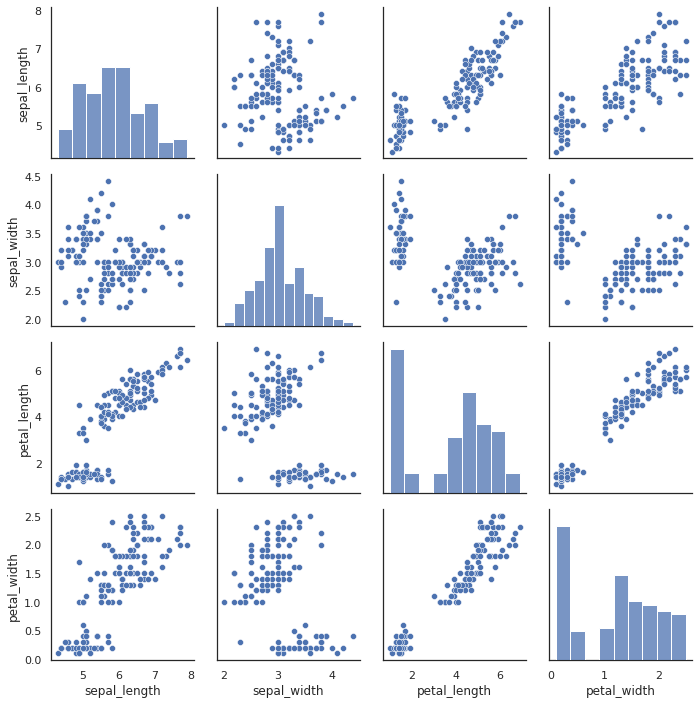

In [2]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

En el gráfico anterior hay cuatro histogramas. El primero es para la variable "sepal_length". El segundo para "sepal_width". El tercero para "petal_length" y el último para "petal_width". Por arriba de los histogramas se observa el [diagrama de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) (o scattergram como se le conoce en inglés). Observe que estos diagramas de dispersión tienen una "imagen espejo" por debajo de los histogramas también. Para evitar esta redundancia, vamos a modificar un poco el gráfico anterior y vamos a meterle los diagramas de kernel y el valor de la correlación entre las variables.

In [3]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

/home/jc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


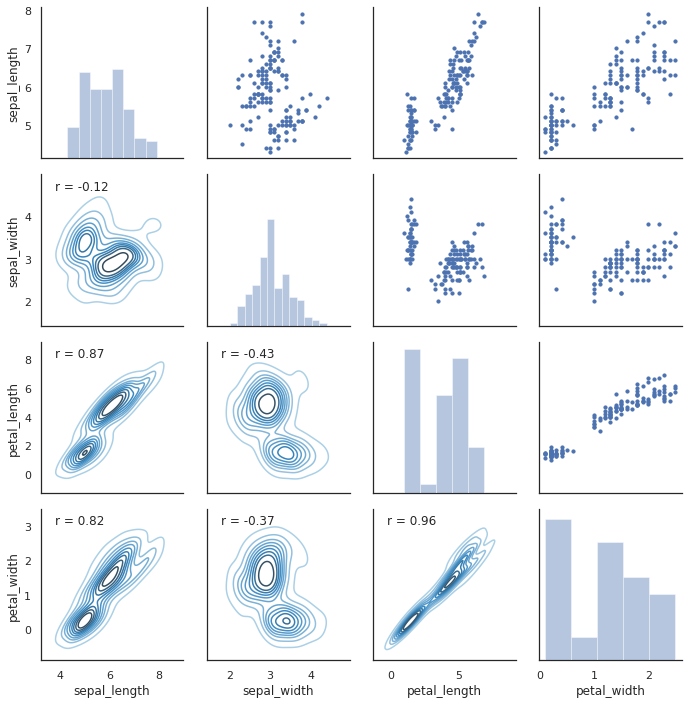

In [4]:
g = sns.PairGrid(iris, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(corrfunc)
g.map_lower(sns.kdeplot, cmap="Blues_d")

Ahora, vamos a ver con el caso 2 de nuestro curso (corruption data) cómo se corre una regresión múltiple.

In [5]:
df = pd.read_excel('corruption_dataset.xlsx')
df = df.rename(columns={'Important to be loyal to friends and devote to people close':'L2F'})
df.head()

country       L2F  Important to care for nature and environment  \
0      AT  1.760611                                      2.227601   
1      BE  1.766017                                      2.021146   
2      BG  1.878880                                      2.013168   
3      CH  1.687326                                      1.815804   
4      CY  1.809091                                      2.247225   

   Important to follow traditions and customs  \
0                                    2.824227   
1                                    2.701725   
2                                    2.131638   
3                                    2.845982   
4                                    2.066465   

   Important to seek fun and things that give pleasure  S-Share Agri  \
0                                           2.785684        0.041066   
1                                           2.552646        0.048717   
2                                           3.420653        0.035884   
3                                           3.095371        0.039200   
4                                           2.615071        0.016290   

   S-Share Arts  S-Share Biochem  S-Share Busi  S-Share Chem Engi  ...  \
0      0.012665         0.086354      0.008529           0.015693  ...   
1      0.017300         0.084760      0.008046           0.017919  ...   
2      0.008043         0.083110      0.001650           0.039183  ...   
3      0.012069         0.090559      0.007926           0.022426  ...   
4      0.019005         0.041629      0.033484           0.021719  ...   

   Important to have a good time  Important to make own decisions and be free  \
0                       2.482671                                     2.024153   
1                       2.563717                                     2.164903   
2                       3.323795                                     2.539850   
3                       2.191643                                     1.896417   
4                       3.097536                                     2.140974   

   Important to help people and care for others well-being  \
0                                           2.325286         
1                                           2.113523         
2                                           2.286036         
3                                           2.138143         
4                                           1.886089         

   Important to be successful and that people recognize achievements  \
0                                           2.895833                   
1                                           3.148189                   
2                                           2.530455                   
3                                           3.331839                   
4                                           3.131823                   

   Important that government is strong and ensures safety  \
0                                           2.478036        
1                                           2.511446        
2                                           1.769978        
3                                           2.655505        
4                                           1.810484        

   Important to seek adventures and have an exciting life  \
0                                           3.785654        
1                                           3.896379        
2                                           3.826453        
3                                           4.117680        
4                                           3.666667        

   Important to behave properly  Important to get respect from others  CPI  \
0                      2.891706                              3.036689  8.6   
1                      2.567688                              3.198329  7.3   
2                      2.332574                              4.341634  4.0   
3                      2.906637                              2.950484  9.1 

In [6]:
df2 = df[['country', 'L2F', 'CPI', 'GDP per capita (current US$)']]
df2.tail()

country       L2F  CPI  GDP per capita (current US$)
18      RU  2.125264  2.5                   6947.502130
19      SE  2.066750  9.2                  43948.624735
20      SI  2.120819  6.4                  19405.933275
21      SK  2.340792  4.7                  12842.248579
22      UA  2.363496  2.8                   2303.018831

In [7]:
X = df2[['L2F', 'GDP per capita (current US$)']]
Y = df2['CPI']

In [8]:
import statsmodels.api as sm

In [9]:
model = sm.OLS(Y, X).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CPI   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              366.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                    4.72e-17
Time:                        00:13:56   Log-Likelihood:                         -36.724
No. Observations:                  23   AIC:                                      77.45
Df Residuals:                      21   BIC:                                      79.72
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
L2F                              1.7439      0.238      7.338      0.000       1.250       2.238
GDP per capita (current US$)     0.0001   1.33e-05      8.377      0.000    8.38e-05       0.000
==============================================================================
Omnibus:                        4.261   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.021
Skew:                          -0.887   Prob(JB):                        0.221
Kurtosis:                       3.095   Cond. No.                     3.21e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretación de los resultados:
El modelo de regresión que acabamos de correr nos indica que una gran proporción de la varianza del índice de percepción de corrupción (CPI) resulta explicado por la lealtad que se le tiene a los amigos y familiares dentro de la sociedad (L2F). Más concretamente, el modelo mostró un índice de explicación bien elevado ($R^2_{adj}$ = 0.969; F = 366.3; p = 4.72e-17). No obstante, entre las dos variables predictoras, puede observarse que tanto la lealtad a los amigos y familiares (L2F) como el producto interno bruto per capita (GDP per capita (current US$\$$)) resultaron ser variables que estadísticamente contribuyen a la explicación de la variabilidad observada de CPI. La estimación estadística del coeficiente que estima la relación entre L2F y CPI resultó ser significativa (coef = 1.7439, std err = 0.238, t = 7.338, p = 0.000) al igual que la estimación estadística del coeficiente para la relación entre GDP per capita (current US$) y CPI (coef = 0.0001, std err = 1.33e-05, t = 8.377, p = 0.000).

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
results = smf.ols('CPI ~ L2F*GDP per capita (current US$)', data=df2)
fitted_model=results.fit()
fitted_model.summary()
fig = plt.figure(figsize=(8, 6))
results = smf.ols('CPI ~ L2F*GDP per capita (current US$)', data=df2).fit()
sm.graphics.plot_regress_exog(results, 'L2F', fig=fig)


PatsyError: error tokenizing input (maybe an unclosed string?)
    CPI ~ L2F*GDP per capita (current US$)
                                        ^

In [12]:
df2 = df2.rename(columns={'GDP per capita (current US$)':'GDPpc'})
df2.tail()

country       L2F  CPI         GDPpc
18      RU  2.125264  2.5   6947.502130
19      SE  2.066750  9.2  43948.624735
20      SI  2.120819  6.4  19405.933275
21      SK  2.340792  4.7  12842.248579
22      UA  2.363496  2.8   2303.018831

In [20]:
results = smf.ols('CPI ~ L2F * GDPpc', data=df2)
fitted_model=results.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     20.53
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           3.50e-06
Time:                        00:34:41   Log-Likelihood:                -33.282
No. Observations:                  23   AIC:                             74.56
Df Residuals:                      19   BIC:                             79.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2213      4.840      1.492      0.152      -2.909      17.352
L2F           -1.6307      2.331     -0.700      0.493      -6.510       3.248
GDPpc       9.152e-05      0.000      0.658      0.518      -0.000       0.000
L2F:GDPpc   1.044e-06   6.89e-05      0.015      0.988      -0.000       0.000
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   2.460
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.641
Skew:                          -0.103   Prob(JB):                        0.726
Kurtosis:                       2.209   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

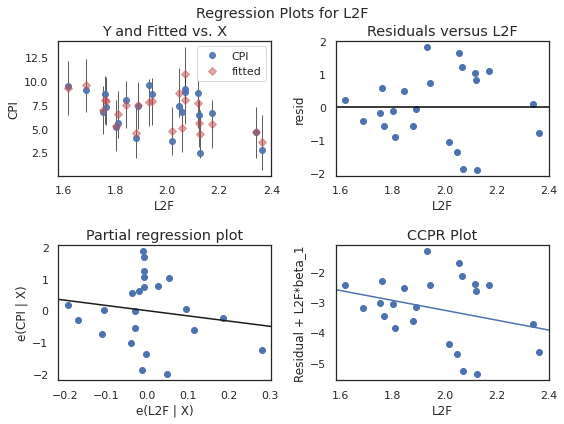

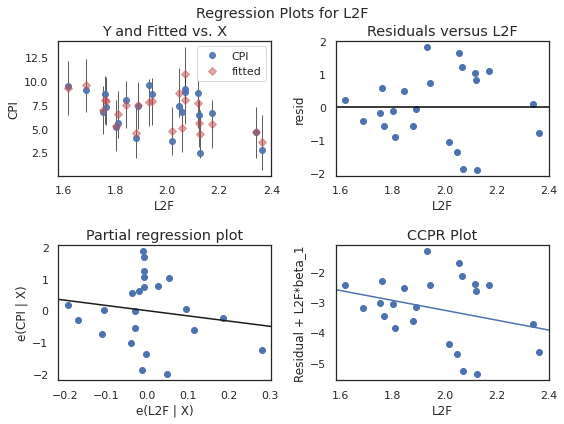

In [21]:
fig = plt.figure(figsize=(8, 6))
results = smf.ols('CPI ~ L2F * GDPpc', data=df2).fit()
sm.graphics.plot_regress_exog(results, 'L2F', fig=fig)